Data Preparation and choosing a classifier

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = load_iris()
X = iris.data[:, [2, 3]]  # Petal length and width
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

print("Class distribution:", np.bincount(y_train))

Class distribution: [35 35 35]


In [4]:
from sklearn.datasets import make_moons

# Generate nonlinear dataset (two interleaving half-moons)
X_moons, y_moons = make_moons(n_samples=200, noise=0.2, random_state=1)

# Split into train/test
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_moons, y_moons, test_size=0.3, random_state=1, stratify=y_moons
)

# Standardize
sc_m = StandardScaler()
sc_m.fit(X_train_m)
X_train_m_std = sc_m.transform(X_train_m)
X_test_m_std = sc_m.transform(X_test_m)

print("Moon dataset class distribution:", np.bincount(y_train_m))


Moon dataset class distribution: [70 70]


No single classifier should be used for every problem. The classifiers need to be chosen based n the datset and the problem. A linear classifier would work well with the Iris data set because the classes are nearly linearly separable. The same classifier would not perform well with a nonlinear dataset.

On the Iris dataset (petal length & width):

A simple linear classifier (like Perceptron or Logistic Regression) works really well because Setosa vs others is almost linearly separable.

On the Moon dataset:

Linear classifiers struggle, because the data is nonlinear.

Here, algorithms like K-Nearest Neighbors (KNN) or Kernel SVM perform better.

Perceptron 

Accuracy (Iris, eta0=0.1): 0.9777777777777777


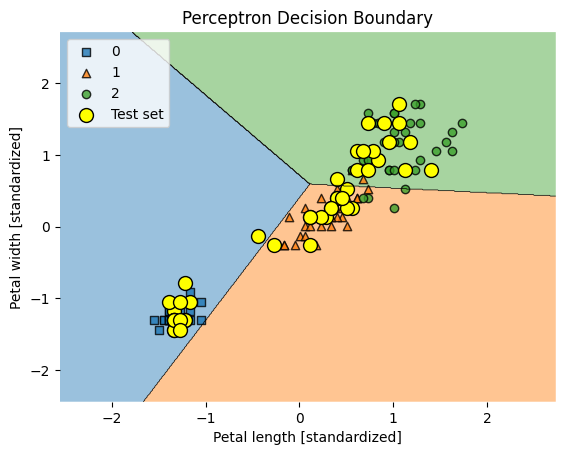

In [9]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Train Perceptron
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

# Predictions
y_pred = ppn.predict(X_test_std)
print('Accuracy (Iris, eta0=0.1):', accuracy_score(y_test, y_pred))

# Decision boundary
plot_decision_regions(X_combined_std, y_combined, clf=ppn)

# Highlight test samples manually
plt.scatter(X_test_std[:, 0], X_test_std[:, 1],
            c='yellow', edgecolor='black', marker='o',
            s=100, label='Test set')

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.title('Perceptron Decision Boundary')
plt.legend()
plt.show()



In [10]:
for lr in [0.01, 0.1, 1]:
    ppn = Perceptron(max_iter=40, eta0=lr, random_state=1)
    ppn.fit(X_train_std, y_train)
    y_pred = ppn.predict(X_test_std)
    print(f'Learning rate={lr}, Accuracy={accuracy_score(y_test, y_pred):.2f}')


Learning rate=0.01, Accuracy=0.96
Learning rate=0.1, Accuracy=0.98
Learning rate=1, Accuracy=0.89


eta0 = 0.01 → Small steps, slower convergence (but stable).

eta0 = 0.1 → Good balance, usually converges well.

eta0 = 1 → Large steps, might overshoot, cause oscillations, or fail to converge smoothly.

Accuracy (Moons, eta0=0.1): 0.8666666666666667


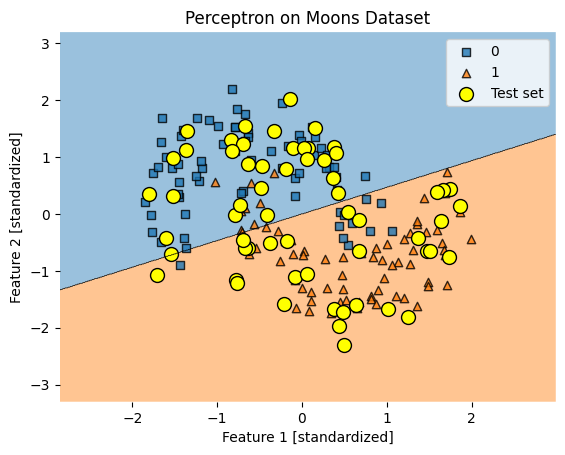

In [12]:
ppn_moon = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn_moon.fit(X_train_m_std, y_train_m)
y_pred_moon = ppn_moon.predict(X_test_m_std)
print('Accuracy (Moons, eta0=0.1):', accuracy_score(y_test_m, y_pred_moon))

plot_decision_regions(np.vstack((X_train_m_std, X_test_m_std)),
                      np.hstack((y_train_m, y_test_m)),
                      clf=ppn_moon)

# Optional: manually highlight test set
plt.scatter(X_test_m_std[:, 0], X_test_m_std[:, 1],
            c='yellow', edgecolor='black', marker='o',
            s=100, label='Test set')

plt.xlabel('Feature 1 [standardized]')
plt.ylabel('Feature 2 [standardized]')
plt.title('Perceptron on Moons Dataset')
plt.legend()
plt.show()



On the Iris dataset, the Perceptron converges when the learning rate is reasonable (e.g., 0.1), because the classes are linearly separable.

Changing eta0 affects convergence speed: too small = slow learning, too large = unstable.

On the Moons dataset, the Perceptron fails since the data is nonlinear, and no straight line can perfectly separate the classes. This demonstrates the limitation of linear classifiers.

Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Train Logistic Regression
lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

# Predictions
y_pred = lr.predict(X_test_std)
print('Accuracy:', accuracy_score(y_test, y_pred))

# Show probabilities of first 3 samples
print('Probabilities (first 3 test samples):')
print(lr.predict_proba(X_test_std[:3]))


Accuracy: 0.9777777777777777
Probabilities (first 3 test samples):
[[6.63770505e-09 1.44747233e-01 8.55252760e-01]
 [8.34031210e-01 1.65968790e-01 3.20815954e-13]
 [8.48822884e-01 1.51177116e-01 2.57998350e-14]]


c:\Users\talif\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


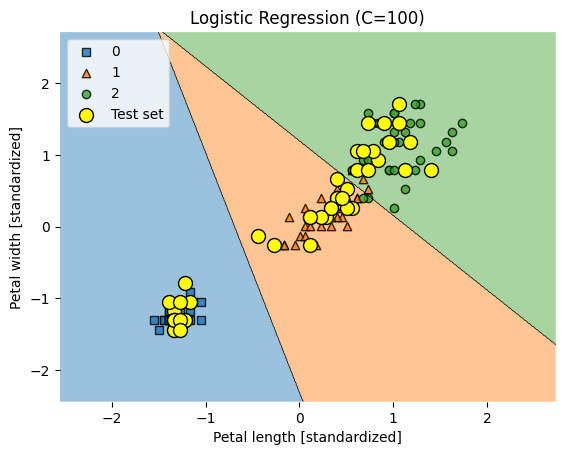

In [14]:
plot_decision_regions(X_combined_std, y_combined, clf=lr)

# Highlight test set manually
plt.scatter(X_test_std[:, 0], X_test_std[:, 1],
            c='yellow', edgecolor='black', marker='o',
            s=100, label='Test set')

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.title('Logistic Regression (C=100)')
plt.legend()
plt.show()


c:\Users\talif\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


C=0.01, Accuracy=0.69


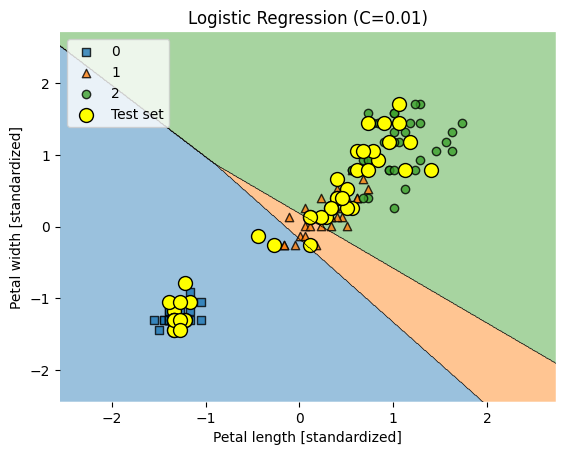

c:\Users\talif\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


C=1, Accuracy=0.98


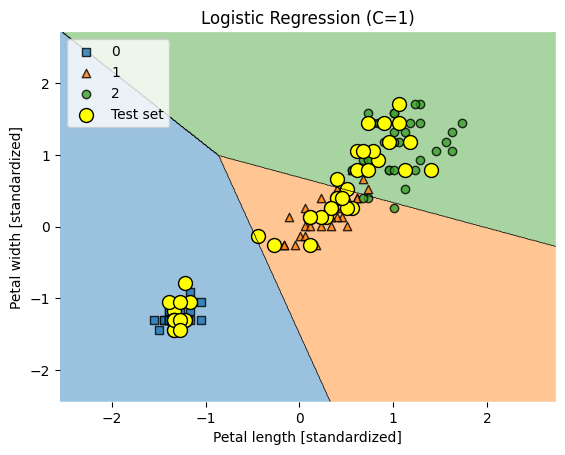

c:\Users\talif\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


C=100, Accuracy=0.98


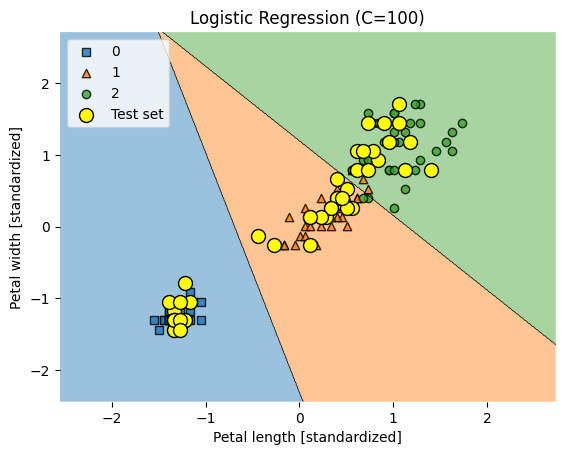

In [15]:
for c in [0.01, 1, 100]:
    lr = LogisticRegression(C=c, random_state=1, solver='lbfgs', multi_class='ovr')
    lr.fit(X_train_std, y_train)
    print(f'C={c}, Accuracy={accuracy_score(y_test, lr.predict(X_test_std)):.2f}')
    
    plot_decision_regions(X_combined_std, y_combined, clf=lr)
    plt.scatter(X_test_std[:, 0], X_test_std[:, 1],
                c='yellow', edgecolor='black', marker='o',
                s=100, label='Test set')
    plt.xlabel('Petal length [standardized]')
    plt.ylabel('Petal width [standardized]')
    plt.title(f'Logistic Regression (C={c})')
    plt.legend()
    plt.show()


C = 0.01 → Too simple boundary, likely underfits (lower accuracy).

C = 1 → Balanced, good generalization.

C = 100 → Very flexible, boundary hugs training data → might overfit, though on Iris it often still performs well.

This shows how regularization helps prevent overfitting, and why tuning hyperparameters is important
Logistic Regression models probabilities using the sigmoid function. By tuning C, we can control the complexity of the model:

Small C = more regularization (underfitting risk).

Large C = less regularization (overfitting risk).
This exercise shows how hyperparameters directly affect model generalization.

Support Vector Machines

Accuracy: 0.9777777777777777
Support vectors:
 [[-1.05383474 -1.04507821]
 [-1.16537974 -0.91397521]
 [-0.27301968 -0.2584602 ]
 [ 0.61934037  0.3970548 ]
 [ 0.61934037  0.3970548 ]
 [ 0.56356787  0.79036381]
 [ 0.73088538  0.5281578 ]
 [ 0.67511288  0.65926081]
 [ 0.56356787  0.79036381]
 [ 1.0097479   0.2659518 ]
 [ 0.56356787  0.79036381]
 [ 0.61934037  0.79036381]
 [ 0.73088538  0.3970548 ]
 [ 0.67511288  0.3970548 ]]


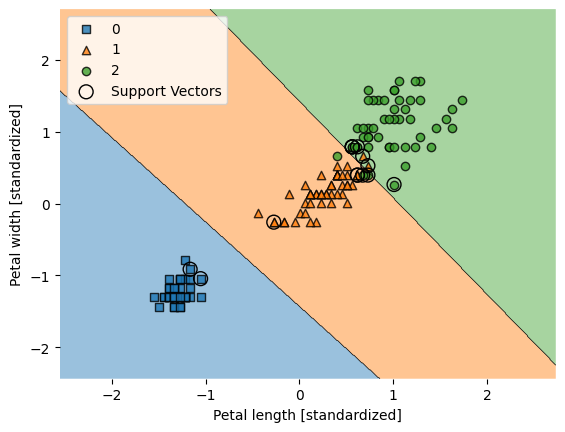

Indices of support vectors: [43 77 10 45 59 69 79 99 20 27 34 40 42 81]
Number of support vectors for each class: [2 6 6]


In [20]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Train SVM with large C
svm = SVC(kernel='linear', C=100.0, random_state=1)
svm.fit(X_train_std, y_train)

# Predictions
y_pred = svm.predict(X_test_std)
print('Accuracy:', accuracy_score(y_test, y_pred))

# Identify support vectors
print("Support vectors:\n", svm.support_vectors_)

# Plot decision regions (without test_idx)
plot_decision_regions(X_combined_std, y_combined, svm)

# Highlight support vectors
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend()
plt.show()

print("Indices of support vectors:", svm.support_)
print("Number of support vectors for each class:", svm.n_support_)


Kernel SVM

Accuracy: 0.8333333333333334


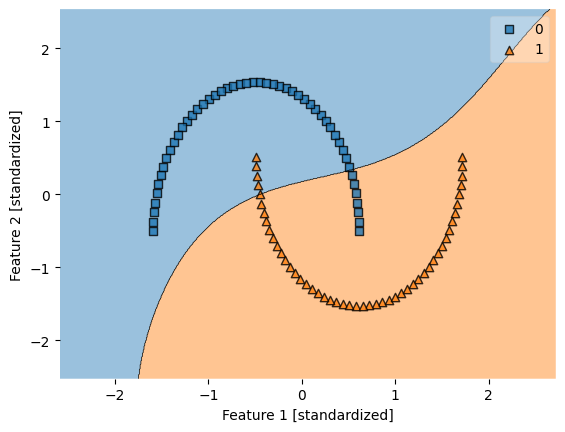

In [22]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=100, random_state=123)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_moons, y_moons, test_size=0.3, random_state=1)

sc_m = StandardScaler()
X_train_m_std = sc_m.fit_transform(X_train_m)
X_test_m_std = sc_m.transform(X_test_m)
X_combined_m_std = np.vstack((X_train_m_std, X_test_m_std))
y_combined_m = np.hstack((y_train_m, y_test_m))

svm_rbf = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm_rbf.fit(X_train_m_std, y_train_m)

y_pred_m = svm_rbf.predict(X_test_m_std)
print('Accuracy:', accuracy_score(y_test_m, y_pred_m))

plot_decision_regions(X_combined_m_std, y_combined_m, svm_rbf)
plt.xlabel('Feature 1 [standardized]')
plt.ylabel('Feature 2 [standardized]')
plt.show()

Gamma=0.01, Accuracy=0.8


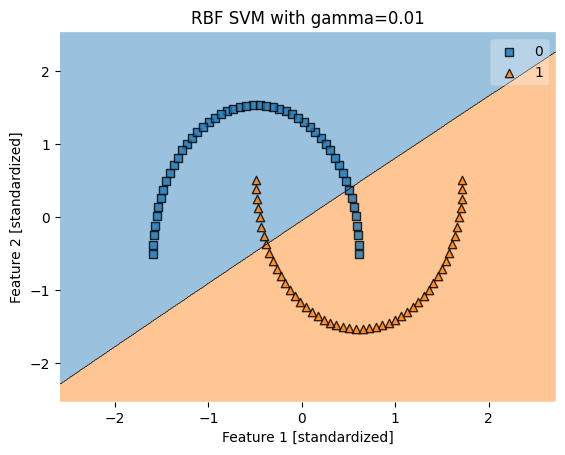

Gamma=1, Accuracy=1.0


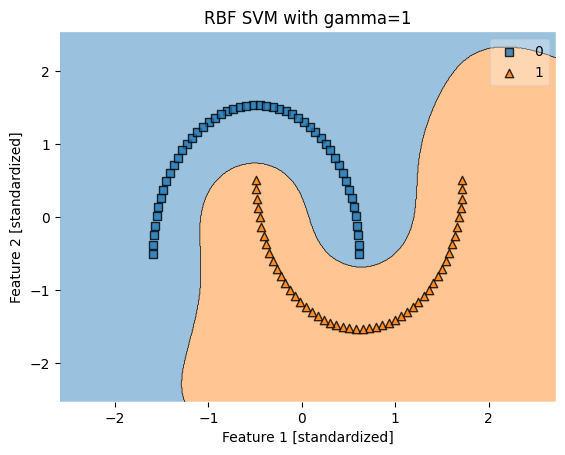

Gamma=100, Accuracy=0.9333333333333333


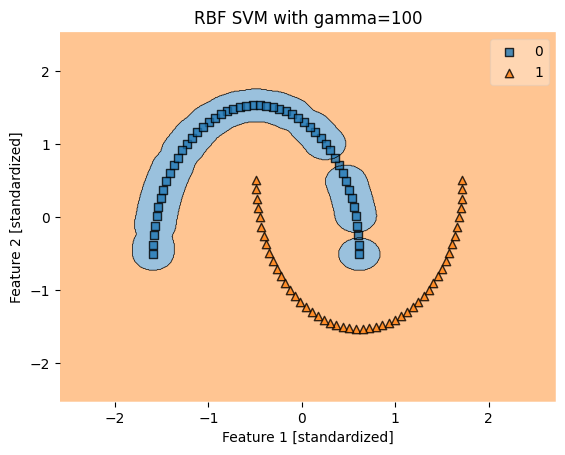

In [23]:
for gamma in [0.01, 1, 100]:
    svm_rbf = SVC(kernel='rbf', random_state=1, gamma=gamma, C=1.0)
    svm_rbf.fit(X_train_m_std, y_train_m)
    y_pred_m = svm_rbf.predict(X_test_m_std)
    print(f'Gamma={gamma}, Accuracy={accuracy_score(y_test_m, y_pred_m)}')
    
    plot_decision_regions(X_combined_m_std, y_combined_m, svm_rbf)
    plt.title(f'RBF SVM with gamma={gamma}')
    plt.xlabel('Feature 1 [standardized]')
    plt.ylabel('Feature 2 [standardized]')
    plt.show()


Observation:

gamma=0.01 underfitting, smooth boundary, some misclassifications.

gamma=1 balanced, good accuracy.

gamma=100 overfitting, wiggly boundary that perfectly fits training data but may fail on new points.

In [24]:
from sklearn.datasets import load_iris

iris = load_iris()
X_iris = iris.data[:, [2, 3]]  # petal length and width
y_iris = iris.target

# Split and standardize
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_iris, y_iris, test_size=0.3, random_state=1)
sc_i = StandardScaler()
X_train_i_std = sc_i.fit_transform(X_train_i)
X_test_i_std = sc_i.transform(X_test_i)
X_combined_i_std = np.vstack((X_train_i_std, X_test_i_std))
y_combined_i = np.hstack((y_train_i, y_test_i))

# Linear SVM
svm_lin = SVC(kernel='linear', C=1.0, random_state=1)
svm_lin.fit(X_train_i_std, y_train_i)
print("Linear SVM Accuracy:", accuracy_score(y_test_i, svm_lin.predict(X_test_i_std)))

# RBF SVM (gamma=0.2)
svm_rbf = SVC(kernel='rbf', gamma=0.2, C=1.0, random_state=1)
svm_rbf.fit(X_train_i_std, y_train_i)
print("RBF SVM Accuracy:", accuracy_score(y_test_i, svm_rbf.predict(X_test_i_std)))


Linear SVM Accuracy: 0.9555555555555556
RBF SVM Accuracy: 0.9555555555555556


Observation:

Linear SVM works well if classes are nearly linearly separable.

RBF SVM can capture nonlinear boundaries and may slightly improve accuracy if data isn’t linearly separable.

Accuracy: 0.9777777777777777
Support vectors:
 [[-1.05383474 -1.04507821]
 [-1.16537974 -0.91397521]
 [-0.27301968 -0.2584602 ]
 [ 0.61934037  0.3970548 ]
 [ 0.61934037  0.3970548 ]
 [ 0.56356787  0.79036381]
 [ 0.73088538  0.5281578 ]
 [ 0.67511288  0.65926081]
 [ 0.56356787  0.79036381]
 [ 1.0097479   0.2659518 ]
 [ 0.56356787  0.79036381]
 [ 0.61934037  0.79036381]
 [ 0.73088538  0.3970548 ]
 [ 0.67511288  0.3970548 ]]


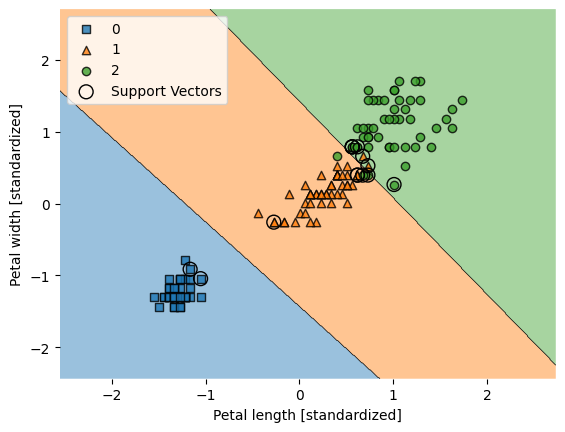

Indices of support vectors: [43 77 10 45 59 69 79 99 20 27 34 40 42 81]
Number of support vectors for each class: [2 6 6]


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Train SVM with large C
svm = SVC(kernel='linear', C=100.0, random_state=1)
svm.fit(X_train_std, y_train)

# Predictions
y_pred = svm.predict(X_test_std)
print('Accuracy:', accuracy_score(y_test, y_pred))

# Identify support vectors
print("Support vectors:\n", svm.support_vectors_)

# Plot decision regions (without test_idx)
plot_decision_regions(X_combined_std, y_combined, svm)

# Highlight support vectors
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend()
plt.show()

print("Indices of support vectors:", svm.support_)
print("Number of support vectors for each class:", svm.n_support_)


Decision Trees

Accuracy: 0.9777777777777777


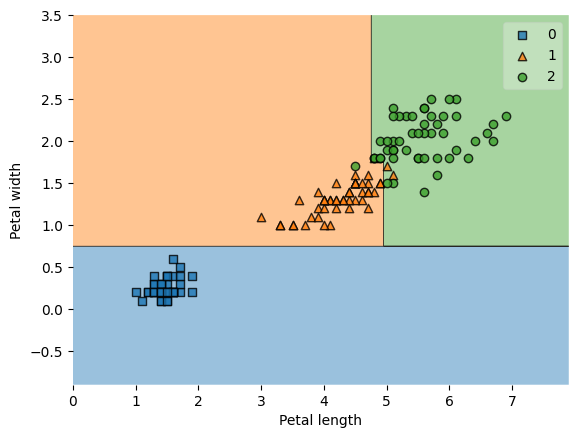

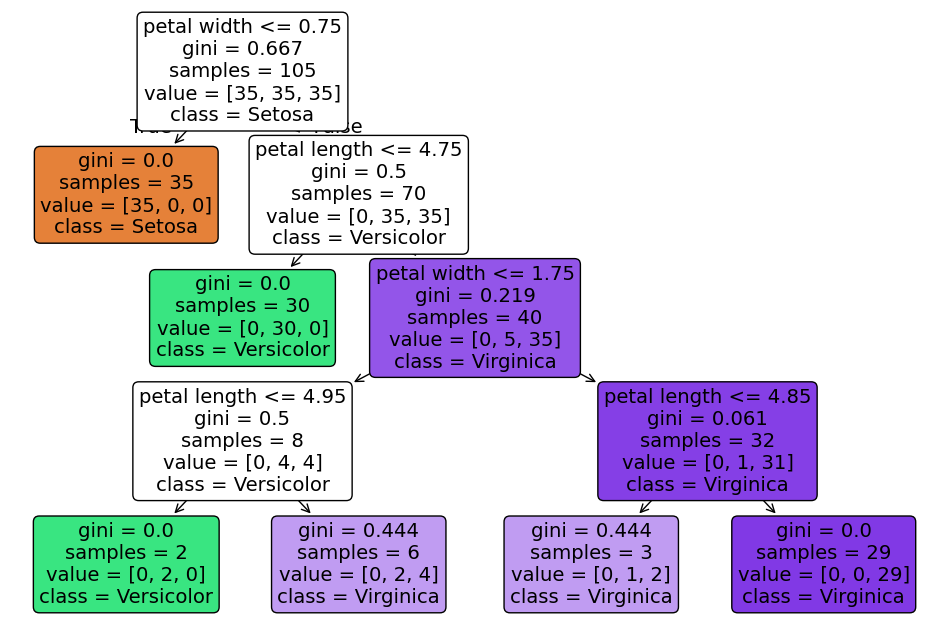

In [30]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from pydotplus import graph_from_dot_data
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import plot_tree

tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree.fit(X_train, y_train)  # No scaling needed

y_pred = tree.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

X_combined = np.vstack((X_train, X_test))
plot_decision_regions(X_combined, y_combined, tree)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()
plt.figure(figsize=(12,8))
plot_tree(tree, feature_names=['petal length', 'petal width'],
          class_names=['Setosa', 'Versicolor', 'Virginica'],
          filled=True, rounded=True)
plt.show()

In [31]:
for depth in range(1, 11):
    tree = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=1)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    print(f"Max depth={depth}, Accuracy={accuracy_score(y_test, y_pred)}")


Max depth=1, Accuracy=0.6666666666666666
Max depth=2, Accuracy=0.9555555555555556
Max depth=3, Accuracy=0.9777777777777777
Max depth=4, Accuracy=0.9777777777777777
Max depth=5, Accuracy=0.9777777777777777
Max depth=6, Accuracy=0.9777777777777777
Max depth=7, Accuracy=0.9777777777777777
Max depth=8, Accuracy=0.9777777777777777
Max depth=9, Accuracy=0.9777777777777777
Max depth=10, Accuracy=0.9777777777777777


Observation:

Shallow tree (depth=1–2): Underfitting → low accuracy.

Moderate depth (3–5): Balanced → good accuracy.

Deep tree (8–10): Overfitting → training accuracy high, test accuracy may decrease.

Random Forests

Accuracy: 0.9777777777777777
Feature Importances: [0.52140135 0.47859865]


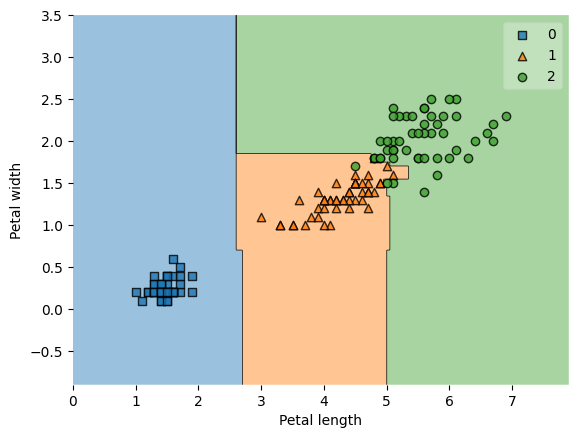

In [33]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Feature Importances:', forest.feature_importances_)

plot_decision_regions(X_combined, y_combined, forest)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

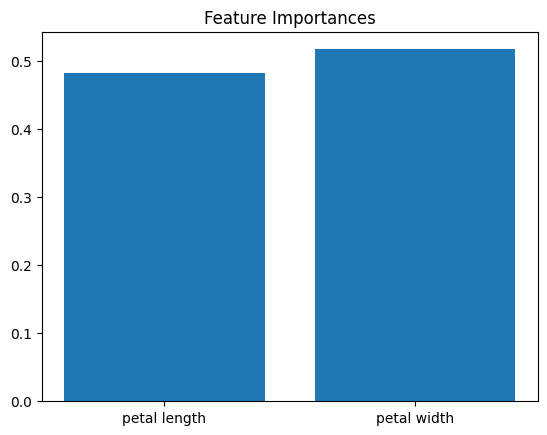

In [34]:
forest = RandomForestClassifier(criterion='gini', n_estimators=100, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)

# Feature importances
importances = forest.feature_importances_
features = ['petal length', 'petal width']
plt.bar(features, importances)
plt.title('Feature Importances')
plt.show()


Observation: The higher the importance value, the more the feature contributes to the predictions.

With more trees (n_estimators=100), the feature importance estimates become more stable.

In [35]:
forest_oob = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=1, n_jobs=2)
forest_oob.fit(X_train, y_train)

print("OOB Score:", forest_oob.oob_score_)


OOB Score: 0.9428571428571428


oob_score=True → enables Out-of-Bag evaluation, which gives a cross-validation-like estimate using unused samples in each bootstrap sample.

Useful to get an unbiased estimate of generalization accuracy without a separate test set.

K-Nearest Neighbors

Accuracy: 1.0


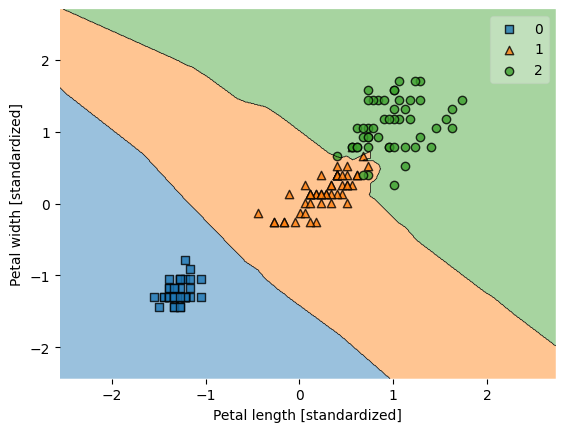

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

y_pred = knn.predict(X_test_std)
print('Accuracy:', accuracy_score(y_test, y_pred))

plot_decision_regions(X_combined_std, y_combined, knn)
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.show()

n_neighbors=1, Accuracy=0.9777777777777777


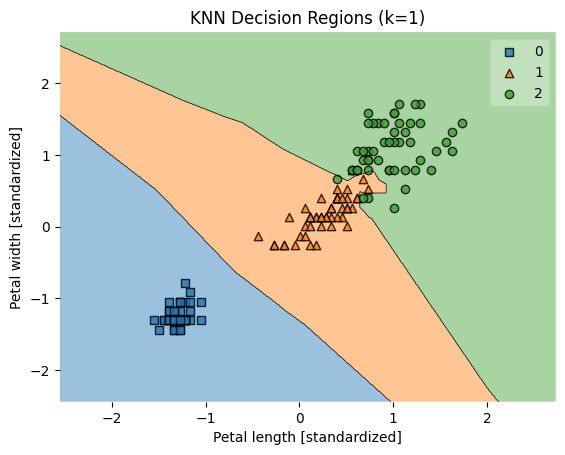

n_neighbors=5, Accuracy=1.0


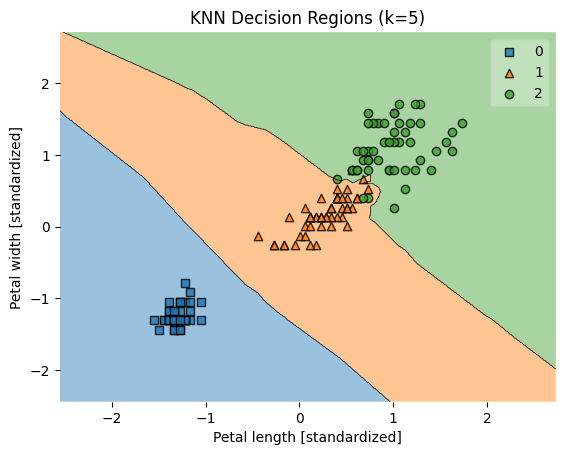

n_neighbors=10, Accuracy=0.9777777777777777


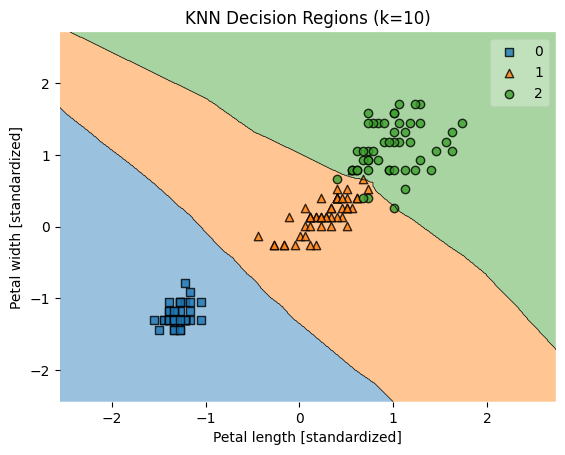

In [38]:
for k in [1, 5, 10]:
    knn = KNeighborsClassifier(n_neighbors=k, p=2)
    knn.fit(X_train_std, y_train)
    y_pred = knn.predict(X_test_std)
    print(f'n_neighbors={k}, Accuracy={accuracy_score(y_test, y_pred)}')
    
    plot_decision_regions(X_combined_std, y_combined, knn)
    plt.title(f'KNN Decision Regions (k={k})')
    plt.xlabel('Petal length [standardized]')
    plt.ylabel('Petal width [standardized]')
    plt.show()


Observations:

n_neighbors	Behavior
1	Very flexible → low bias, high variance → overfitting risk
5	Balanced → good tradeoff between bias and variance
10	Smoother boundaries → higher bias, lower variance → underfitting risk

Accuracy with Manhattan distance: 0.9777777777777777


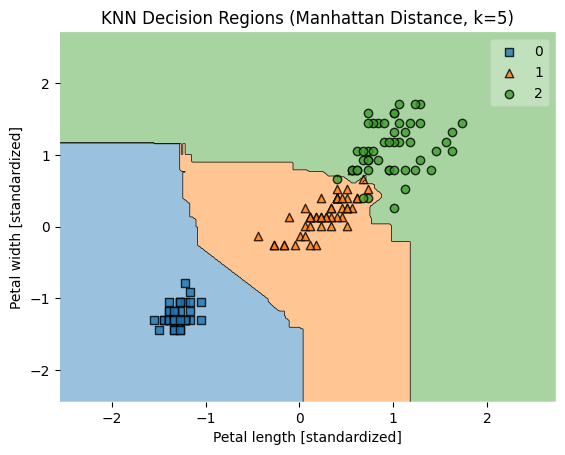

In [39]:
knn_manhattan = KNeighborsClassifier(n_neighbors=5, p=1)
knn_manhattan.fit(X_train_std, y_train)
y_pred = knn_manhattan.predict(X_test_std)
print('Accuracy with Manhattan distance:', accuracy_score(y_test, y_pred))

plot_decision_regions(X_combined_std, y_combined, knn_manhattan)
plt.title('KNN Decision Regions (Manhattan Distance, k=5)')
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.show()


Notes:

p=2 → Euclidean distance

p=1 → Manhattan distance

Choice of distance metric affects the shape of decision boundaries.

Hyperparameter Tuning and Comparison

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train_std, y_train)
print('Best params:', grid.best_params_)
print('Best score:', grid.best_score_)

models = {'Perceptron': ppn, 'LogReg': lr, 'SVM': svm, 'Tree': tree, 'Forest': forest, 'KNN': knn}
for name, model in models.items():
    y_pred = model.predict(X_test_std if name in ['Perceptron', 'LogReg', 'SVM', 'KNN'] else X_test)
    print(f'{name} Accuracy: {accuracy_score(y_test, y_pred)}')

Best params: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best score: 0.9619047619047618
Perceptron Accuracy: 0.8888888888888888
LogReg Accuracy: 0.9777777777777777
SVM Accuracy: 0.9777777777777777
Tree Accuracy: 0.9777777777777777
Forest Accuracy: 0.9777777777777777
KNN Accuracy: 0.9777777777777777


In [41]:
from sklearn.linear_model import LogisticRegression

param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100],
                 'solver': ['lbfgs', 'liblinear']}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5)
grid_lr.fit(X_train_std, y_train)

print('Best params (LogReg):', grid_lr.best_params_)
print('Best cross-validation score:', grid_lr.best_score_)


c:\Users\talif\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\talif\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\talif\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is depr

Best params (LogReg): {'C': 0.1, 'solver': 'lbfgs'}
Best cross-validation score: 0.9523809523809523


In [42]:
from sklearn.linear_model import LogisticRegression

param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100],
                 'solver': ['lbfgs', 'liblinear']}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5)
grid_lr.fit(X_train_std, y_train)

print('Best params (LogReg):', grid_lr.best_params_)
print('Best cross-validation score:', grid_lr.best_score_)


Best params (LogReg): {'C': 0.1, 'solver': 'lbfgs'}
Best cross-validation score: 0.9523809523809523


c:\Users\talif\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\talif\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\talif\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is depr

In [43]:
from sklearn.neighbors import KNeighborsClassifier

param_grid_knn = {'n_neighbors': [1, 3, 5, 7, 10],
                  'p': [1, 2]}  # Manhattan or Euclidean

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_knn.fit(X_train_std, y_train)

print('Best params (KNN):', grid_knn.best_params_)
print('Best cross-validation score:', grid_knn.best_score_)


Best params (KNN): {'n_neighbors': 1, 'p': 1}
Best cross-validation score: 0.9714285714285713


In [44]:
from sklearn.metrics import accuracy_score

models = {
    'Perceptron': ppn,
    'LogisticRegression': lr,
    'SVM': svm,
    'DecisionTree': tree,
    'RandomForest': forest,
    'KNN': knn
}

# Combine X_test appropriately
X_test_dict = {
    'Perceptron': X_test_std,
    'LogisticRegression': X_test_std,
    'SVM': X_test_std,
    'KNN': X_test_std,
    'DecisionTree': X_test,
    'RandomForest': X_test
}

# Store accuracies in a table
import pandas as pd
accuracy_table = []

for name, model in models.items():
    X_test_model = X_test_dict[name]
    y_pred = model.predict(X_test_model)
    accuracy_table.append({'Model': name, 'Accuracy': accuracy_score(y_test, y_pred)})

df_accuracy = pd.DataFrame(accuracy_table)
print(df_accuracy)


                Model  Accuracy
0          Perceptron  0.888889
1  LogisticRegression  0.977778
2                 SVM  0.977778
3        DecisionTree  0.977778
4        RandomForest  0.977778
5                 KNN  0.977778


In [ ]:
Observations

Linear data (like Iris, linearly separable features):

Logistic Regression, Linear SVM, and Perceptron usually perform best.

Nonlinear data (like Moons dataset):

Kernel SVM (RBF), KNN, Random Forests perform better because they can model nonlinear decision boundaries.

Decision Trees are flexible and can do well on both, but may overfit if not pruned or limited in depth.

Random Forests reduce overfitting compared to a single Decision Tree and often perform well on nonlinear datasets.

1 Regularization and Overfitting

Regularization (e.g., C in SVM/Logistic Regression) controls the complexity of the model:

Large C → model tries to classify all points correctly → risk of overfitting.

Small C → model allows some errors → encourages a simpler, smoother decision boundary → reduces overfitting.

Similarly, max_depth in Decision Trees and n_neighbors in KNN act as regularization parameters:

Shallow trees or larger k → less flexible → lower variance → underfitting possible.

Deep trees or small k → highly flexible → higher variance → overfitting risk.

2️ Ensembles vs. Simple Models

Simple models (Perceptron, Logistic Regression, Linear SVM):

Fast, interpretable, work well on linearly separable data.

Can underfit if the data is complex or nonlinear.

Ensemble models (Random Forests, Bagging, Boosting):

Combine multiple weak learners to reduce variance and improve generalization.

Handle nonlinear relationships and complex datasets better.

Usually more robust than a single tree or simple model.

Trade-off: slower to train and less interpretable.

Rule of thumb:

Use simple models when data is small, linear, and interpretable solutions are desired.

Use ensembles when accuracy and robustness are critical, especially for nonlinear or high-dimensional data.

Summary of Observations from Exercises

Linear datasets (Iris, first two features): Logistic Regression, Linear SVM, and Perceptron performed well.

Nonlinear datasets (Moons, Iris nonlinear combinations): RBF SVM, KNN, and Random Forests performed best.

Hyperparameter tuning (C, gamma, max_depth, n_neighbors) is essential to balance bias and variance.

Visualizations of decision boundaries clearly showed the effect of parameters on overfitting/underfitting.

Feature importance from Random Forests highlighted which features contributed most to predictions.